In [351]:
import numpy as np
from scipy.integrate import odeint as od
from scipy.optimize import newton as ne
import pylab as plt

**Ecuaciones diferenciales**


$$\frac{dv_x}{dt} = -b(v_x-u\cos \alpha )$$

$$\frac{dv_y}{dt} = -g-b(v_y-u\sin \alpha )$$


*Condiciones iniciales*

$b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$

In [352]:
g, b, theta_grad, v0, alpha = 9.8, 0.05, 60, 50, np.pi
u, theta = v0/2, np.deg2rad(theta_grad)
x0, y0 = 0, 0
T = np.linspace(0,30,10000)

*Consideramos:*

$$ \frac{dx}{dt} = v_x $$

$$ \frac{dy}{dt} = v_y $$

In [353]:
def v_0(v0, theta):
    v0_x, v0_y = v0 * np.cos(theta), v0 * np.sin(theta)
    return v0_x, v0_y

v0_x, v0_y = v_0(v0, theta)
c_i = x0, v0_x, y0, v0_y

*Primer punto*

In [354]:
def dv_dt(c_i, t, g, b, u, alpha, theta):

    x0, v_x, y0, v_y = c_i

    dx_dt = v_x
    d2x_dt2 =  -b * (v_x - u* np.cos(alpha))
    dy_dt = v_y
    d2y_dt2 = -g -b * (v_y - u * np.sin(alpha))
    

    return np.array((dx_dt, d2x_dt2, dy_dt, d2y_dt2))



In [355]:
X_n = od(dv_dt, c_i, T, args = (g, b, u, alpha, theta))[:,0]
V_X_n = od(dv_dt, c_i, T, args = (g, b, u, alpha, theta))[:,1]
Y_n = od(dv_dt, c_i, T, args = (g, b, u, alpha, theta))[:,2]
V_Y_n = od(dv_dt, c_i, T, args = (g, b, u, alpha, theta))[:,3]

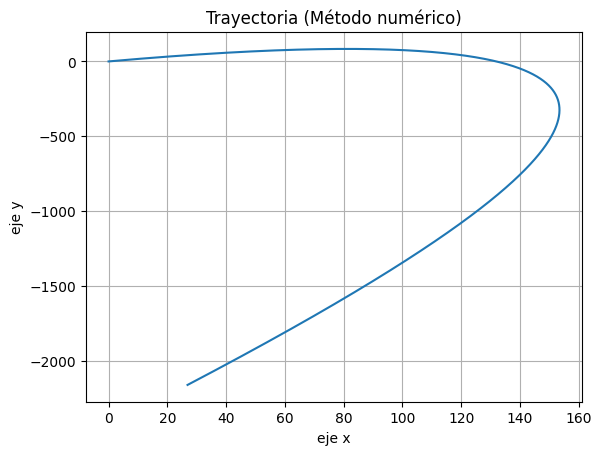

In [356]:
plt.plot(X_n,Y_n)
plt.title("Trayectoria (Método numérico)")
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.grid()
plt.show()

**Solución Analítica**

*Posición en x*

$$x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))$$


*Posicion en y*

$$y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t$$

In [357]:
x_ = lambda t, v0, g, b, u, alpha, theta: ( u * np.cos(alpha) * t )  +  ( 1/b ) * ( v0 * np.cos(theta) - u * np.cos(alpha) ) * ( 1 - np.exp(-b*t) )
y_ = lambda t, v0, g, b, u, alpha, theta: ( 1/b ) * ( (g/b) + v0 * np.sin(theta) - u * np.sin(alpha) ) * ( 1 - np.exp(-b*t) ) - ( (g/b) - u * np.sin(alpha) ) * t

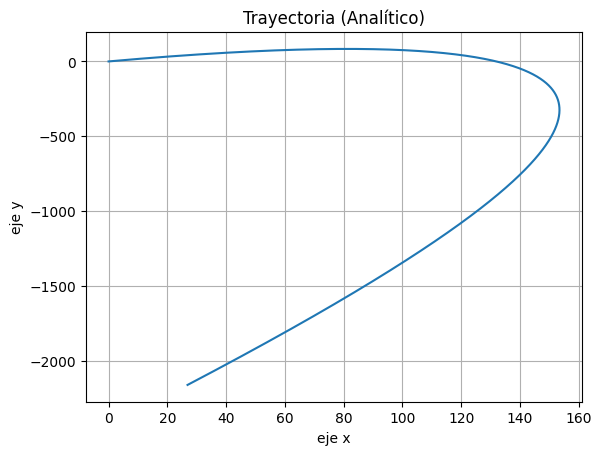

In [358]:
X_a = x_(T, v0, g, b, u, alpha, theta)
Y_a = y_(T, v0, g, b, u, alpha, theta)

plt.plot(X_a, Y_a)
plt.title("Trayectoria (Analítico)")
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.grid()
plt.show()

*Tercer punto*

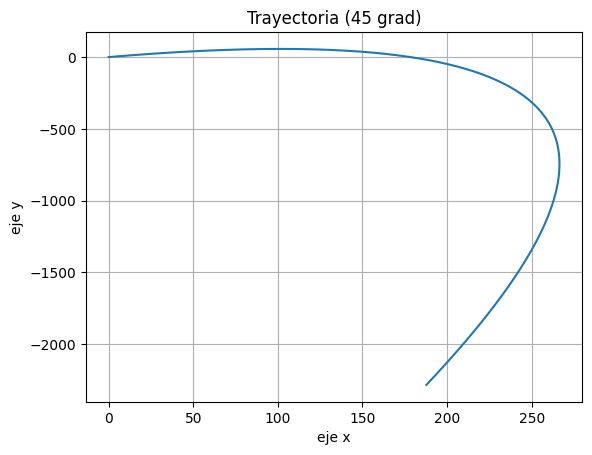

In [359]:
theta_45 = np.deg2rad(45)

X_45 = x_(T, v0, g, b, u, alpha, theta_45)
Y_45 = y_(T, v0, g, b, u, alpha, theta_45)

plt.plot(X_45, Y_45)
plt.title("Trayectoria (45 grad)")
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.grid()
plt.show()

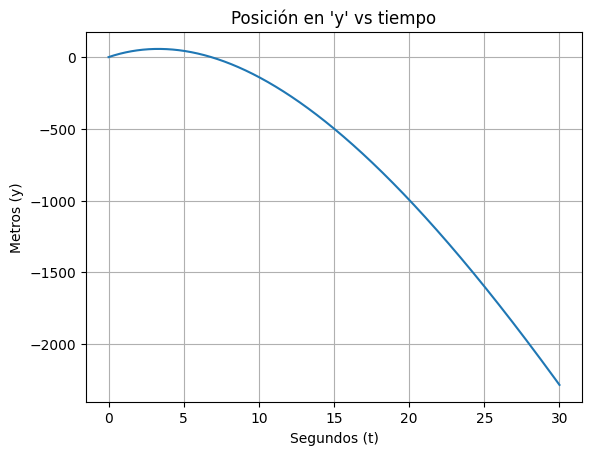

In [360]:
plt.plot(T, Y_45)
plt.title("Posición en 'y' vs tiempo")
plt.xlabel("Segundos (t)")
plt.ylabel("Metros (y)")
plt.grid()
plt.show()

In [361]:
tiempo_vuelo = ne(y_,5, args = (v0, g, b, u, alpha, theta_45) )

print("El tiempo de vuelo es: "+str(tiempo_vuelo)+" segundos")

El tiempo de vuelo es: 6.827653967594583 segundos


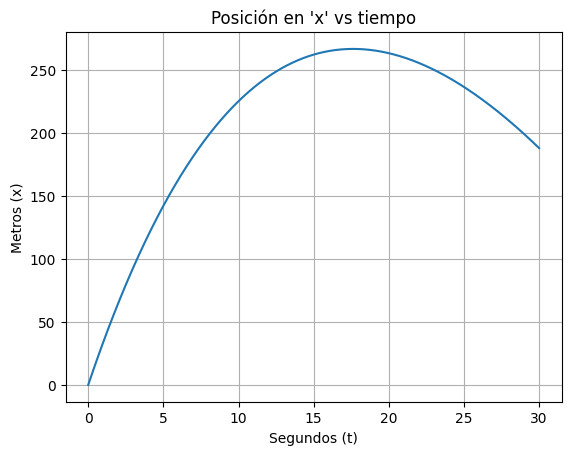

In [362]:
plt.plot(T, X_45)
plt.title("Posición en 'x' vs tiempo")
plt.xlabel("Segundos (t)")
plt.ylabel("Metros (x)")
plt.grid()
plt.show()

In [363]:
alcance = x_(tiempo_vuelo, v0, g, b, u, alpha, theta_45)

print("El alcance hprizontal es: "+str(alcance)+" metros")

El alcance hprizontal es: 178.41981844694112 metros


*Cuarto & Quinto punto*

In [364]:
THETA_DEG_ = np.arange(10,81,1, dtype = float)
THETA_RAD_ = np.deg2rad(THETA_DEG_[:])

In [365]:
def ALCANCE_(theta, x_, y_ , v0, g, b, u, alpha):

    tiempo_vuelo = ne(y_,8, args = (v0, g, b, u, alpha, theta) )
    alcance = x_(tiempo_vuelo, v0, g, b, u, alpha, theta)
    
    return alcance

ALCANCE__ = np.vectorize(ALCANCE_)

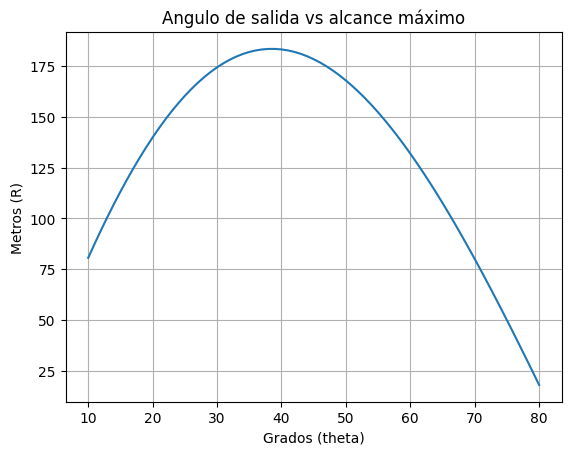

In [366]:
ALCANCE = ALCANCE__(THETA_RAD_, x_, y_ , v0, g, b, u, alpha)

plt.plot(THETA_DEG_, ALCANCE)
plt.title("Angulo de salida vs alcance máximo")
plt.xlabel("Grados (theta)")
plt.ylabel("Metros (R)")
plt.grid()
plt.show()

*Sexto punto*

In [367]:
angulo_critico = ne(ALCANCE_, 1.4, args = (x_, y_ , v0, g, b, u, alpha) )
angulo_critico_deg = np.rad2deg(angulo_critico)

print("El ángulo crítico es: "+str(angulo_critico_deg)+" metros")

El ángulo crítico es: 82.73111507835249 metros


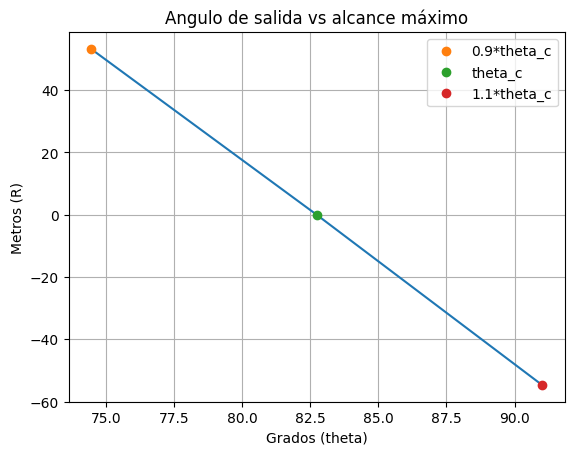

In [368]:
THETA_C = np.array([0.9*angulo_critico, angulo_critico, 1.1*angulo_critico])
THETA_C_DEG = np.rad2deg(THETA_C[:])
ALCANCE_C = ALCANCE__(THETA_C, x_, y_ , v0, g, b, u, alpha)

plt.plot(THETA_C_DEG, ALCANCE_C)
plt.plot(THETA_C_DEG[0], ALCANCE_C[0], 'o', label = "0.9*theta_c")
plt.plot(THETA_C_DEG[1], ALCANCE_C[1], 'o', label = "theta_c")
plt.plot(THETA_C_DEG[2], ALCANCE_C[2], 'o', label = "1.1*theta_c")
plt.title("Angulo de salida vs alcance máximo")
plt.xlabel("Grados (theta)")
plt.ylabel("Metros (R)")
plt.legend()
plt.grid()
plt.show()

*Septimo punto*

In [369]:
THETA_7_DEG = np.arange(10,45,5)
THETA_7_RAD = np.deg2rad(THETA_7_DEG[:])

In [370]:
X_7 = np.zeros((np.shape(THETA_7_RAD)[0], np.shape(T)[0]))
Y_7 = np.zeros((np.shape(THETA_7_RAD)[0], np.shape(T)[0]))

for i in range(np.shape(THETA_7_RAD)[0]):

    X_7[i,:] = x_(T, v0, g, b, u, alpha, THETA_7_RAD[i])
    Y_7[i,:] = y_(T, v0, g, b, u, alpha, THETA_7_RAD[i])

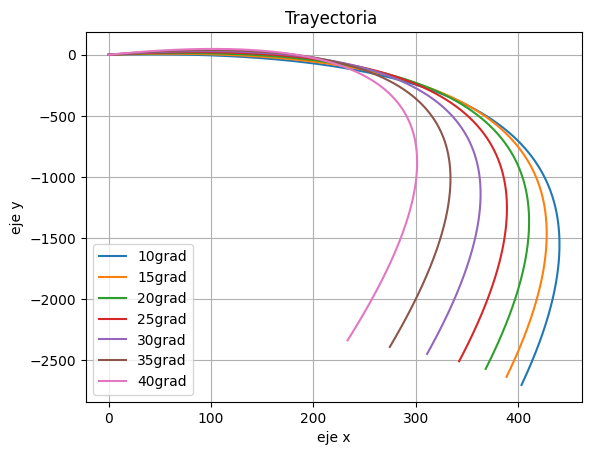

In [371]:
for i in range(np.shape(X_7)[0]):

    plt.plot(X_7[i,:], Y_7[i,:], label = str(THETA_7_DEG[i]) +"grad")
    plt.title("Trayectoria ")
    plt.xlabel("eje x")
    plt.ylabel("eje y")
    plt.grid()
    plt.legend()

plt.show()

*Punto 8*

In [372]:
MAXIMA_ALTURA = np.zeros(np.shape(Y_7)[0])

for i in range(np.shape(Y_7)[0]):
    MAXIMA_ALTURA[i] = np.max(Y_7[i,:])


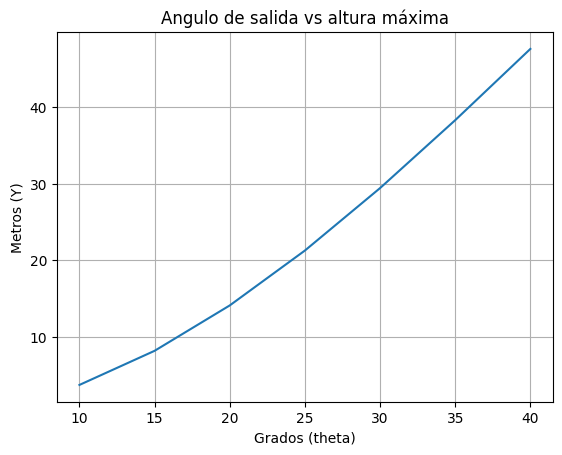

In [373]:
plt.plot(THETA_7_DEG, MAXIMA_ALTURA)
plt.title("Angulo de salida vs altura máxima")
plt.xlabel("Grados (theta)")
plt.ylabel("Metros (Y)")
plt.grid()
plt.show()